# Lesson 67: Car Price Prediction - Data Exploration

### Teacher-Student Activities

In the last class, you learn to calculate variance inflation factor to detect multicollinearity in a linear regression model. You also learnt that it is one of the ways to select features or eliminate features. Also, in the previous class, you concluded that the linear regression algorithm could not accurately predict the relative humdity values from the temperature and ozone values.

In this class, we will solve another problem statement which is to predict prices of cars based on their technical specifications such as engine capacity, brand etc. To solve this problem, we will use linear regression and find out how well it predicts prices of cars_df.

Let's look at the problem statement in detail.

---

### Problem Statement

You need to build a linear regression model to predict prices of cars based on its technical specifications such as car manufacturer, its engine capacity, fuel efficiency, body-type etc.

**Dataset Description:**

The dataset contains 205 rows and 26 columns. Each column represents an attribute of a car as described in the table below.

|Sr No.|Attribute|Attribute Information|
|-|-|-|
|1|Car_ID|Unique id of each car (Interger)|
|2|Symboling|Assigned insurance risk rating; a value of +3 indicates that the car is risky; -3 suggests that it is probably a safe car (Categorical)|
|3|carCompany|Name of car company (Categorical)|
|4|fueltype| fuel-type i.e. petrol or diesel (Categorical)|
|5|aspiration|Aspiration used in a car (Categorical)|
|6|doornumber|Number of doors in a car (Categorical)|
|7|carbody|Body-type of a car (Categorical)|
|8|drivewheel|Type of drive wheel (Categorical)|
|9|enginelocation|Location of car engine (Categorical)|
|10|wheelbase|Weelbase of car (Numeric)|
|11|carlength|Length of car (Numeric)|
|12|carwidth|Width of car (Numeric)|
|13|carheight|Height of car (Numeric)|
|14|curbweight|The weight of a car without occupants or baggage (Numeric)|
|15|enginetype|Type of engine (Categorical)|
|16|cylindernumber|Number of cylinders placed in the car engine (Categorical)||17|enginesize|Capacity of an engine (Numeric)|
|18|fuelsystem|Fuel system of a car (Categorical)|
|19|boreratio|Bore ratio of car (Numeric)|
|20|stroke|Stroke or volume inside the engine (Numeric)|
|21|compressionratio|Compression ratio of an engine (Numeric)|
|22|horsepower|Power output of an engine (Numeric)|
|23|peakrpm|Peak revolutions per minute (Numeric)|
|24|citympg|Mileage in city (Numeric)|
|25|highwaympg|Mileage on highway (Numeric)|
|26|price(Dependent variable)|Price of a car (Numeric)|

This data set consists of three types of entities:

- the specification of an auto in terms of various characteristics,

- its assigned insurance risk rating,

- its normalised losses in use as compared to other cars.

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process **symboling**. A value of $+3$ indicates that the auto is risky, $-3$ that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality etc.), and represents the average loss per car per year.

**Note:** Several of the attributes in the database could be used as a "class" attribute.

**Dataset source:** https://archive.ics.uci.edu/ml/datasets/Automobile


The above dataset consists of data taken from 1985 Ward's Automotive Yearbook. Here's the list of original sources of the data:

1. 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.

2. Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038

3. Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037






---

#### Activity 1: Importing Modules & Reading Data

Let's import the modules, read the data froma `csv` file to create a data frame and go through the necessary data-cleaning process (if required). Here's the link to the dataset:

https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/car-prices.csv

In [ ]:
# S1.1: Import the modules, read the dataset and create a Pandas DataFrame.
import pandas as pd
df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/car-prices.csv')
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
# S1.2: Get the information on the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are 0 missing or null values in the dataset. Also, a lot of features have non-numeric values. You need to utilise all of them to predict the prices of cars.

---

#### Activitiy 2: Data Cleaning^

Let's clean the data. You need to extract the name of the manufacturer of a from the column `CarName`. Let's look at the first few rows of the `'CarName'` column to understand how the name of a car is reported in the dataset.

In [ ]:
# S2.1: Display the first 25 rows of the 'CarName' column.
df['CarName'].head(25)

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
20         chevrolet vega 2300
21               dodge rampage
22         dodge challenger se
23                  dodge d200
24           dodge monaco (sw)
Name: CarName, dtype: object

Notice that the name of a car follows the name of its manufacturer as illustrated below:

- `alfa-romero` is the manufacturer of `giulia, stelvio` etc cars,

- `audi` is the manufacturer of `100 ls, fox` etc cars,

- `bmw` is the manufacturer of `x1, x3` etc cars

and so on.

Thus, you need to extract the string before a space.

In [ ]:
# S2.2: Extract the name of the manufactures from the car names and display the first 25 cars to verify whether names are extracted successfully.
car_names = []
for i in df['CarName'].str.split() :
  car_names.append(i[0])
car_names

['alfa-romero',
 'alfa-romero',
 'alfa-romero',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'chevrolet',
 'chevrolet',
 'chevrolet',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'isuzu',
 'isuzu',
 'isuzu',
 'isuzu',
 'jaguar',
 'jaguar',
 'jaguar',
 'maxda',
 'maxda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'mercury',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'Nissan',
 'nissan',
 'nissan',


Let's add a new column to the `cars_df` DataFrame that stores the company names.

In [ ]:
# S2.3: Create a new column named 'car_company'. It should store the company names of a the cars.
df.insert(loc=0 , column = 'car_comp' ,value = car_names)
df

,car_comp,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,5,2,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


You may get the count of number of the cars sold by each manufacturer in the dataset.

In [ ]:
# S2.4: Get the count of number of the cars sold by each manufacturer in the dataset.
df['car_comp'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_comp, dtype: int64

As you can see, Toyota has sold the highest number of cars in this dataset.

Notice that the following manufacturer names are misspelled or not regularised (follows the same case i.e. uppper case or lower case or title case):

- `vw` and `vokswagen` should be `volkswagen`,

- `porcshce` should be `porsche`,

- `toyouta` should be `toyota`,

- `Nissan` should be `nissan`,

- `maxda` should be `mazda`

To maintain the quality of data, let's resolve the above issues.

In [ ]:
# S2.5: Replace the misspelled 'car_company' names with their correct names.
df.loc[(df['car_comp'] == 'vw') | (df['car_comp'] == 'vokswagen'), 'car_comp']= 'volkswagen'
# volkswagen
df.loc[(df['car_comp'] == 'porcshce '), 'car_comp']= 'porsche'

# porsche
df.loc[(df['car_comp'] == 'toyouta'), 'car_comp']= 'toyota'

# toyota
df.loc[(df['car_comp'] == 'Nissan'), 'car_comp']= 'nissan'

# nissan
df.loc[(df['car_comp'] == 'maxda'), 'car_comp']= 'mazda'

# mazda
df.loc[(df['car_comp'] == 'vw'), 'car_comp']= 'volkswagen'


Now get the count of number of the cars sold by each manufacturer in the dataset again to verify whether the names are corrected successfully or not.

In [ ]:
# S2.6: Get the count of number of the cars sold by each manufacturer in the dataset again
df['car_comp'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
porcshce        1
Name: car_comp, dtype: int64

Finally the manufacturer names are successfully corrected. Let's now drop the `'CarName'` column as it is of no use to us.

In [ ]:
# S2.7: Drop 'CarName' column from the 'cars_df' DataFrame.
df.drop(columns = 'CarName' , inplace = True)
df


,car_comp,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,1,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,2,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,3,1,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,4,2,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,5,2,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,201,-1,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo,202,-1,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo,203,-1,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
# S2.8: Print the names of the columns to verify whether the 'CarName' column is dropped or not.


---

#### Activity 3: Data Preparation^^

To build linear regression, all the features need to have numeric values.

So, let's first extract all the numeric features from the `cars_df` DataFrame. For this, you need to use the `select_dtypes()` function. It takes a list of data-types (in the form of strings) as inputs that need to be extracted.

**Syntax:** `data_frame.select_dtypes(include = ['data_type1', 'data_type2', ..., data_typeN])`

where `'data_type1', 'data_type2', ..., data_typeN` are $N$ different types of data-types that you wish to extract.




In [ ]:
# S3.1: Use the 'info()' function to get the data-types of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_comp          205 non-null    object 
 1   car_ID            205 non-null    int64  
 2   symboling         205 non-null    int64  
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

The numeric objects are of `int64` and `float64` data-types. You need to extract the features having these data-types.

In [ ]:
# S3.2: Extract all the numeric (float and int type) columns from the dataset.
car_numeric = df.select_dtypes(include = [int,float] )

The `car_ID` column is of no use to build a linear regression model. So, let's drop it.

In [ ]:
# S3.3: Drop the 'car_ID' column from the 'cars_numeric_df' DataFrame.
car_numeric.drop(columns = 'car_ID'  ,inplace = True)

Let's find out the features that strongly and moderately are correlated to the price of a car.

<Axes: >

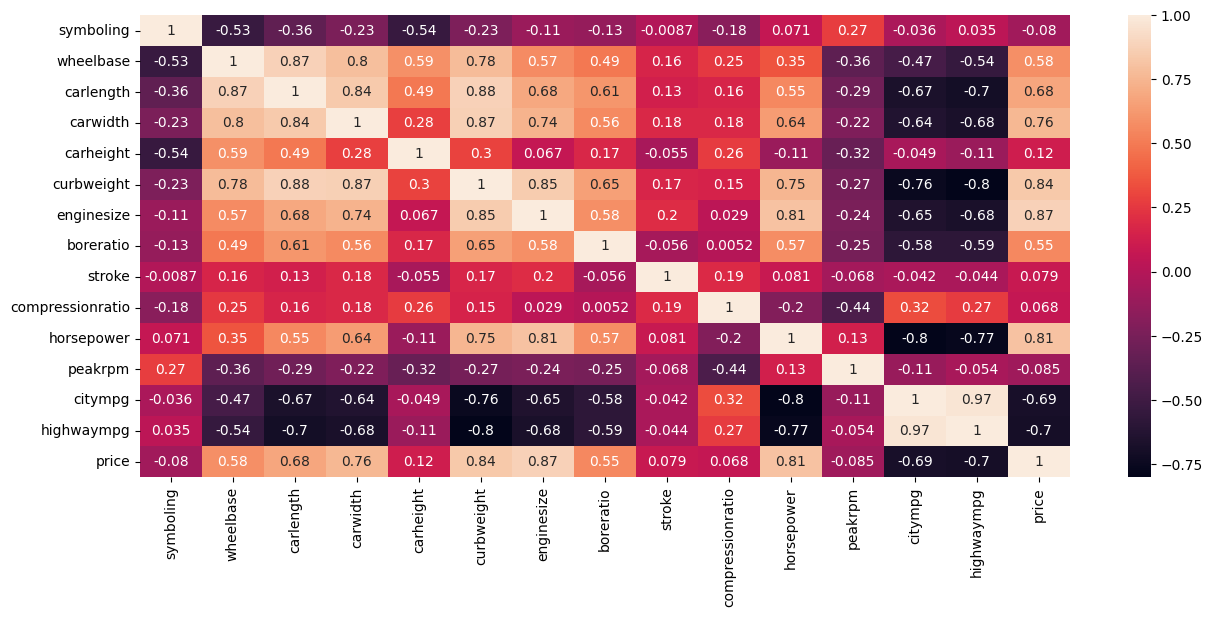

In [ ]:
# S3.4: Draw a correlation heatmap between the numeric features.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
sns.heatmap(car_numeric.corr() , annot = True )

The heatmap shows some useful insights:

**Correlation of `price` with independent variables**

- `price` is highly and positively correlated with `wheelbase, carlength, carwidth, curbweight, enginesize` and `horsepower`

- `price` is negatively correlated to `citympg` and `highwaympg` (`-0.70` approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower. These cars are designed to be affordable by the budget buyers who value more fuel efficiency mileage over powerful engine

**Correlation among independent variables**

- Many independent variables are highly correlated (top-left part of the heatmap) such as `wheelbase, carlength, curbweight, enginesize` etc. They are all measures of size and weight and are positively correlated

So you need to be wary of multicollinearity in the linear regression model that you build.

Now let's look at the first five rows of the `doornumber` and `cylindernumber` columns.

In [ ]:
# S3.5: Get the first five rows of the 'doornumber' and 'cylindernumber' columns.
df[['cylindernumber' , 'doornumber']]

,cylindernumber,doornumber
0,four,two
1,four,two
2,six,two
3,four,four
4,five,four
...,...,...
200,four,four
201,four,four
202,six,four
203,six,four


Notice that the `doornumber` and `cylindernumber` columns are supposed to have numeric type values. But the numbers are reported in the word of words. So, you need to replace these words with the corresponding numbers. For this you can use the `map()` function. But first let's get the counts of all the values in the above two columns so that we can verify with these counts whether the the conversion to numeric values was successful or not.



In [ ]:
# S3.6: Count the occurrence of each value in the 'cylindernumber' column.
df[['cylindernumber' , 'doornumber']].value_counts()

cylindernumber  doornumber
four            four          92
                two           67
six             four          13
                two           11
five            four           8
two             two            4
eight           two            3
five            two            3
eight           four           2
three           two            1
twelve          two            1
dtype: int64

So, you need to represent the above numbers (written in words) into their numeric forms.

In [ ]:
# S3.7: Count the occurrence of each value in the 'doornumber' column
df[['cylindernumber' , 'doornumber']]


,cylindernumber,doornumber
0,4,2
1,4,2
2,6,2
3,4,4
4,5,4
...,...,...
200,4,4
201,4,4
202,6,4
203,6,4


Here, you need to represent `two` and `four` to their numeric forms.Now, let's learn the `map()` function.

---

#### Activity 4: The `map()` Function^^^

A map function is similar to a match the coloum exercise. You have a match one set of values with the other set of values.

Here you need to map:

- `two` to `2`

- `three` to `3`

- `four` to `4`

- `five` to `5`

- `six` to `6`

- `eight` to `8`

- `twelve` to `12`

To do the above replacement,

1. First, you need to create a dictionary in which the words are keys and their corresponding numeric representations are the values.

2. Apply the `map()` function. It takes the dictionary created in step one as an input.

Let's understand this concept with the help of an example. Let's first create a Pandas series containing the above 7 numbers in the word form. Then let's create a dictionary as discussed in the first point. And then apply the `map()` function.



In [ ]:
# T4.1: Use the 'map()' function to replace a words in a Pandas series to their corresponding numeric values.


**How does the `map()` function works?**

It iterates through each element in a series (or array), and then look for that item as a key in the dictionary (the input to the `map()` function). If the key is found, then it replaces the key with its corresponding value in the dictionary.


In [ ]:
# S4.1: Map the values of the 'doornumber' and 'cylindernumber' columns to their corresponding numeric values.
words_dict = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}
df['cylindernumber'] = df['cylindernumber'].map(words_dict)
df['doornumber'] = df['doornumber'].map(words_dict)

Now let's display the first five rows of the `'cylindernumber'` and `'doornumber'` columns to verify whether the replacement was successful or not. Let's also check whether the data-types are integer or not.

In [ ]:
# S4.2: Display the first five rows of the 'cylindernumber' and 'doornumber' columns. Also, check whether the data-types are integer or not.
df[]

Let's stop here now. We are very close to building the linear regression model to predict the car prices that we shall continue from the next class.

---

### **Project**
You can now attempt the **Applied Tech. Project 67 - Car Prices Prediction - Data Exploration** on your own.

**Applied Tech. Project 67 - Car Prices Prediction - Data
Exploration**: https://colab.research.google.com/drive/1veWqbTIAiODYA8xMrXIT782MOU56ZXLx